<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

# Importing packages and displaying version numbers

In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import math
import statistics

from scipy import stats

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
# As a good practice, displaying the library version numbers for future reference:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn:', sns.__version__)
print('Matplotlib:' , matplotlib.__version__)

Numpy:  1.19.2
Pandas:  1.1.3
Seaborn: 0.11.0
Matplotlib: 3.3.2


# 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [9]:
# Read CSV
house_csv = "C:/Users/Monica/Desktop/IoD-Folders/MODULE 4/Labs/Sacramento_realestate_transactions.csv"

house = pd.read_csv("C:/Users/Monica/Desktop/IoD-Folders/MODULE 4/Labs/Sacramento_realestate_transactions.csv")

In [5]:
house.shape

(985, 12)

In [6]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
house.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [8]:
house.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [9]:
# To know is there is a (row) index for this DataFrame using .index
house.index

RangeIndex(start=0, stop=985, step=1)

In [10]:
# To get a concise summary and quick overview of the dataframe before doing EDA using info() function
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [11]:
# Zip is categorical value, should be string
house['zip'] = house['zip'].astype(str)

In [12]:
# Describe data
house.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [13]:
# Got min values 0 for beds, baths, sq__ft which cannot be correct
house[house['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [14]:
# filtering the dataframe using pd.DataFrame.loc to remove zeros from columns beds, baths and sq__ft that do not make any sense:
house = house.loc[house['beds'] * house['baths'] * house['sq__ft'] != 0]

In [15]:
house['beds'].values

array([2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 3, 3, 4,
       4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 3, 4, 4, 1, 2, 3, 3, 2,
       4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3,
       3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 2, 5, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3,
       3, 5, 3, 4, 2, 3, 4, 5, 3, 3, 3, 3, 3, 4, 3, 2, 4, 8, 4, 4, 3, 2,
       4, 5, 3, 2, 5, 4, 5, 5, 4, 2, 3, 4, 3, 4, 3, 4, 4, 4, 3, 5, 5, 4,
       4, 3, 4, 3, 4, 3, 5, 5, 5, 4, 4, 5, 4, 3, 2, 4, 2, 2, 2, 3, 4, 3,
       2, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 3, 2, 4, 3, 4, 3, 3, 3, 4, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 2, 2, 4, 3, 3, 3, 4, 3,
       4, 4, 3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 4, 3, 3, 5, 3, 4, 3, 4, 4, 4,
       3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 2, 3, 3, 2, 4, 3,
       4, 4, 4, 3, 4, 4, 5, 5, 3, 4, 4, 5, 4, 2, 4, 3, 4, 4, 5, 2, 4, 4,
       5, 4, 4, 5, 5, 4, 2, 1, 3, 2, 2, 2, 2, 2, 2,

In [16]:
house['baths'].values

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2,
       2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 4, 2, 2, 2, 1,
       4, 3, 2, 2, 3, 2, 3, 4, 3, 1, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 3,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1,
       2, 2, 3, 2, 2, 2, 3, 4, 2, 2, 3, 4, 2, 1, 2, 1, 3, 4, 3, 2, 3, 3,
       3, 2, 3, 5, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
house['sq__ft'].values

array([ 836, 1167,  796,  852,  797, 1122, 1104, 1177,  941, 1146,  909,
       1289,  871, 1020, 1022, 1134,  844,  795,  588, 1356, 1118, 1329,
       1240, 1601,  901, 1088,  963, 1119, 1380, 1248, 1039, 1152, 1380,
       1116, 1039, 1418, 1082, 1472, 1146,  760, 1304, 1207, 1056, 1043,
       1587, 1120, 1580, 1955, 1656, 1477, 1188, 1590, 1463, 1714, 1185,
       1406, 1943, 1172, 1152, 1851, 1215, 1130, 1603, 1479, 1420, 1280,
       1586, 1362, 2162, 1266, 1715, 1820,  936, 1511, 1590, 1596, 1341,
       2136, 1616, 1478, 1287, 1277, 1448, 2235, 2093, 1193, 2163, 1269,
        958, 2508, 1305, 1591, 1326, 1843, 1921, 2790, 1541, 1018, 1672,
       1380,  975, 2372, 1446, 1284, 3009, 3612, 2056, 1993, 1857, 1126,
       2213, 2494, 1843, 1520, 2800, 2309, 2367, 3516, 1914, 1690, 2725,
       2354, 2185, 1801, 1961, 3134, 1915, 2734, 2110, 3164, 3599, 2054,
       1830, 1627, 3440, 2846, 2359, 2052, 3433, 3615, 2687, 2724, 3440,
       3508, 2462, 2325,  795, 1099,  840,  800,  7

In [18]:
# number of records after dropping zero values that did not make any sense
house.shape

(814, 12)

In [19]:
# Detecting if the dataset has missing values using isnull() function
house.isnull()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
980,False,False,False,False,False,False,False,False,False,False,False,False
981,False,False,False,False,False,False,False,False,False,False,False,False
982,False,False,False,False,False,False,False,False,False,False,False,False
983,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# If there are missing values, they can be count using isnull() in combination with .sum() function
# It is clear that there are not missing values for any of the 12 variables.
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [21]:
# If there are categorical variables in the dataset, it is good to know how many possible values there are in each column. 
# In this case the variable quality could be also understood as an ordinal variable, what is the range of the wine quality dataset?
house['city'].value_counts()

SACRAMENTO         424
ELK GROVE          107
CITRUS HEIGHTS      35
ANTELOPE            33
ROSEVILLE           28
NORTH HIGHLANDS     21
RANCHO CORDOVA      21
CARMICHAEL          20
GALT                20
FOLSOM              15
RIO LINDA           12
ORANGEVALE          11
FAIR OAKS            9
ROCKLIN              8
LINCOLN              6
PLACERVILLE          5
ELVERTA              4
WILTON               4
EL DORADO HILLS      3
GOLD RIVER           3
AUBURN               3
GRANITE BAY          3
POLLOCK PINES        3
LOOMIS               2
RANCHO MURIETA       2
EL DORADO            2
SLOUGHHOUSE          1
CAMERON PARK         1
MEADOW VISTA         1
COOL                 1
WALNUT GROVE         1
GREENWOOD            1
DIAMOND SPRINGS      1
WEST SACRAMENTO      1
PENRYN               1
MATHER               1
Name: city, dtype: int64

In [22]:
house['type'].value_counts()

Residential     759
Condo            42
Multi-Family     13
Name: type, dtype: int64

In [23]:
# To check minimun and maximum value of all columns defining a function
def check_min_max(df):
    # Check min, max of each column
    print(df.describe().T[['min', 'max']])

In [24]:
check_min_max(house)

                   min            max
beds          1.000000       8.000000
baths         1.000000       5.000000
sq__ft      484.000000    5822.000000
price      2000.000000  884790.000000
latitude     38.241514      39.008159
longitude  -121.550527    -120.597599


In [25]:
# Loading the dataset using pd.read_csv
house = pd.read_csv("C:/Users/Monica/Desktop/IoD-Folders/MODULE 4/Labs/Sacramento_realestate_transactions.csv")

<Figure size 1080x504 with 0 Axes>

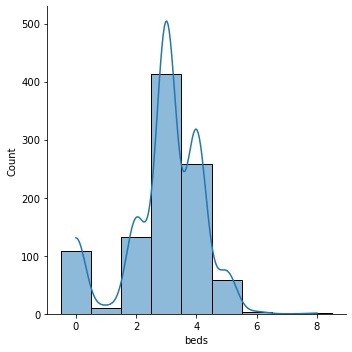

In [26]:
# Plotting univariate histograms for the most representative features
plt.figure(figsize=(15,7))
ax = sns.displot(house, x='beds', discrete=True, kde=True)

<Figure size 1080x504 with 0 Axes>

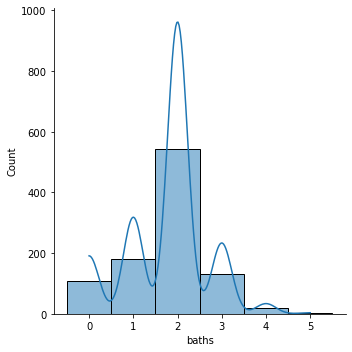

In [27]:
plt.figure(figsize=(15,7))
sns.displot(house, x='baths', discrete=True, kde=True)

<Figure size 1080x504 with 0 Axes>

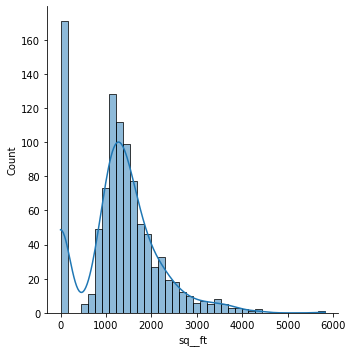

In [28]:
plt.figure(figsize=(15,7))
sns.displot(house, x='sq__ft', kde=True)

<Figure size 1080x504 with 0 Axes>

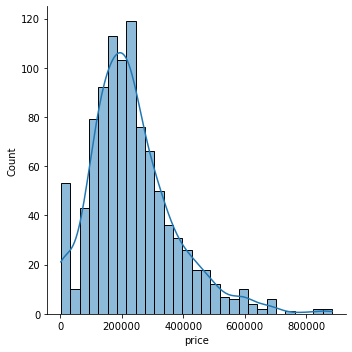

In [29]:
plt.figure(figsize=(15,7))
sns.displot(house, x='price', kde=True)

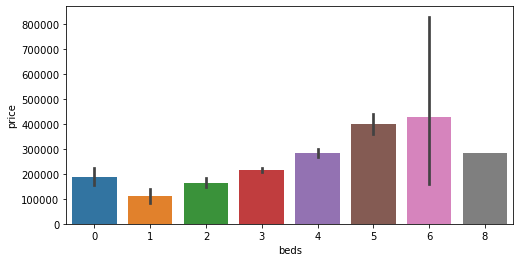

In [30]:
# Plotting to know how continuous variables are distributed against price
fig = plt.figure(figsize = (8,4))
ax = sns.barplot(x = 'beds', y = 'price', data = house)

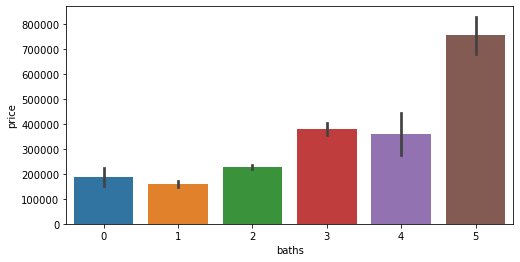

In [31]:
fig = plt.figure(figsize = (8,4))
ax = sns.barplot(x = 'baths', y = 'price', data = house)

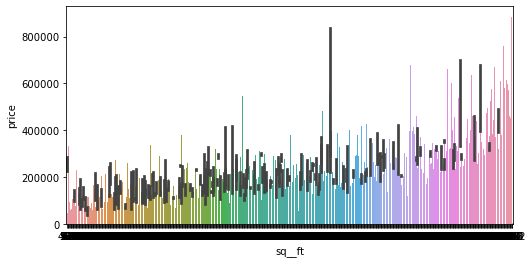

In [32]:
fig = plt.figure(figsize = (8,4))
ax = sns.barplot(x = 'sq__ft', y = 'price', data = house)

In [10]:
house1 = house[['beds', 'baths', 'sq__ft', 'price']]
house1

,beds,baths,sq__ft,price
0,2,1,836,59222
1,3,1,1167,68212
2,2,1,796,68880
3,2,1,852,69307
4,2,1,797,81900
...,...,...,...,...
980,4,3,2280,232425
981,3,2,1477,234000
982,3,2,1216,235000
983,4,2,1685,235301


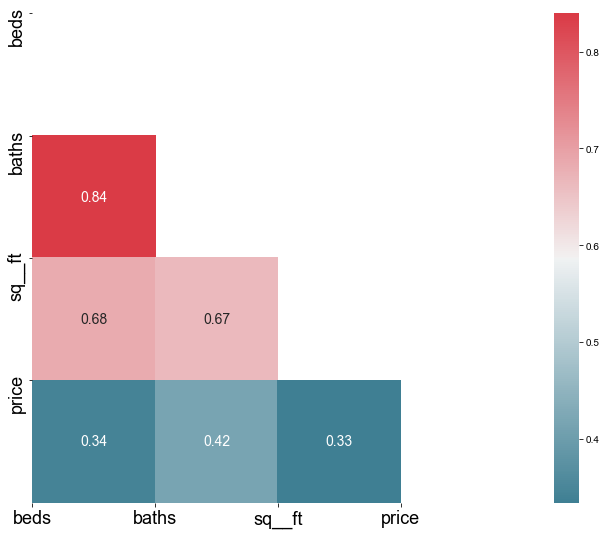

In [34]:
# Scattering plots of pair of variables with high Pearson's correlation
corr = house1.corr()
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf, annot_kws={"size":14})

sns.set(font_scale=0.6)

#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=18);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=18)
#show plot
plt.show()

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds', ylabel='price'>

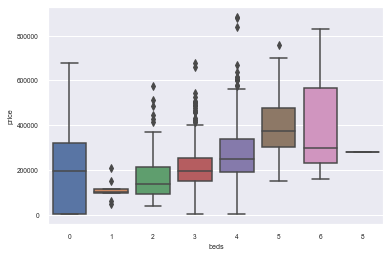

In [35]:
sns.boxplot('beds', 'price', data = house1)

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baths', ylabel='price'>

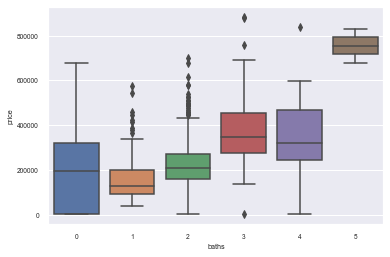

In [36]:
sns.boxplot('baths', 'price', data = house1)

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq__ft', ylabel='price'>

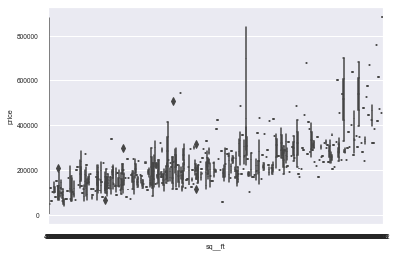

In [37]:
sns.boxplot('sq__ft', 'price', data = house1)

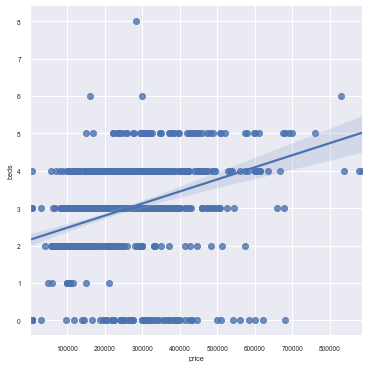

In [86]:
#Scatter plot using seaborn and lmplot(). fit_reg = False
sns.lmplot(x='price', y= 'beds', data= house1, fit_reg = True)

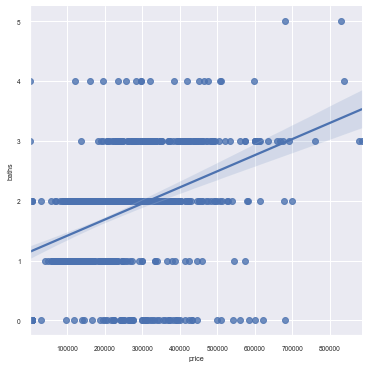

In [87]:
#Scatter plot using seaborn and lmplot(). fit_reg = False
sns.lmplot(x='price', y= 'baths', data= house1, fit_reg = True)

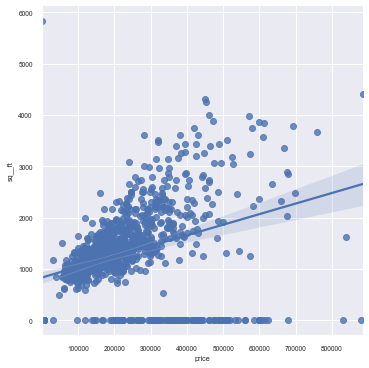

In [88]:
#Scatter plot using seaborn and lmplot(). fit_reg = False
sns.lmplot(x='price', y= 'sq__ft', data= house1, fit_reg = True)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [103]:
# ANSWER
## Price is the target variable. Based on other predictor variables we can predict house price (response)

#### 2.2 List all possible variables which might be Predictor variable.

In [104]:
# ANSWER

## beds
## baths
## sq__ft
## Type

In [12]:
# Target variable
Y = house1['price']

In [13]:
# Predictor variable
X = house1['beds']

In [14]:
def draw_scatter_plot (X,Y):
    ### Plot the data
    # Create a figure
    fig = plt.figure(figsize =(15,7))
    # get the axis of the figure
    ax = plt.gca()
    
    # plot a scatter plot with house data
    ax.scatter(X, Y, c='b')
    plt.show();

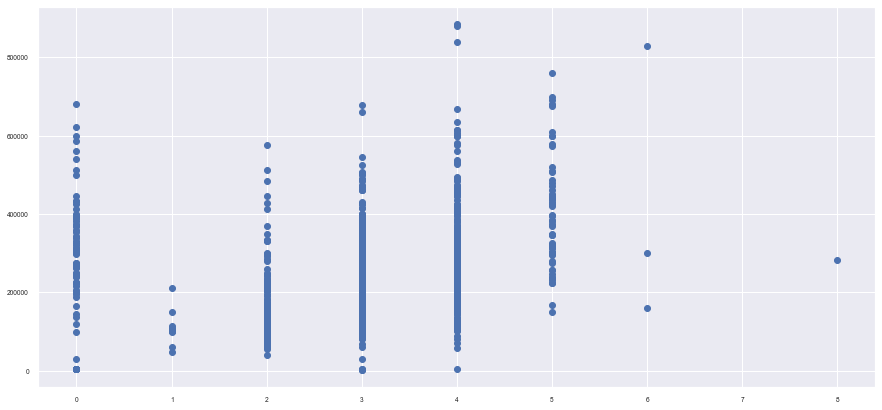

In [107]:
# beds
draw_scatter_plot(house1['beds'], house1['price'])

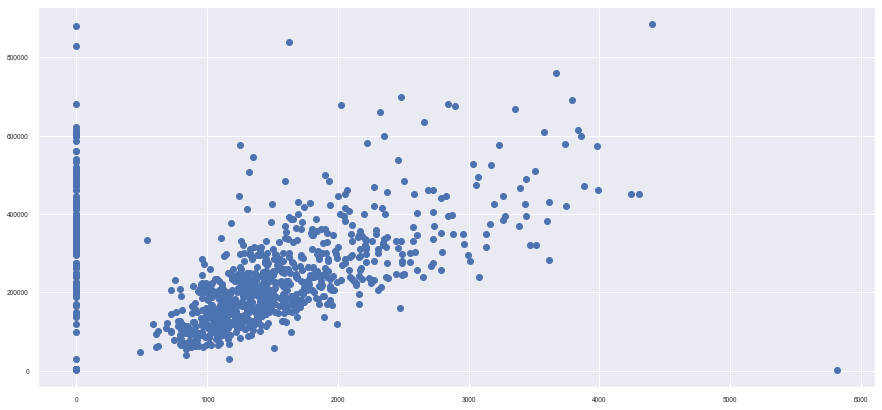

In [108]:
# sq__ft
draw_scatter_plot(house1['sq__ft'], house1['price'])

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [18]:
# ANSWER
house1.corr()

,beds,baths,sq__ft,price
beds,1.000000,0.839650,0.684041,0.342024
baths,0.839650,1.000000,0.665690,0.416208
sq__ft,0.684041,0.665690,1.000000,0.333897
price,0.342024,0.416208,0.333897,1.000000


In [110]:
### sq__ft is the best predictor
### sq__ft got strong relationship with beds (+0.68) and baths (+0.66)

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [19]:
house1.price.mean()

234144.26395939087

In [20]:
# ANSWER

# Mean of price
house1['y_hat'] = house1['price'].mean()

<ipython-input-20-e16eec76a74c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house1['y_hat'] = house1['price'].mean()


In [16]:
house1.head()

,beds,baths,sq__ft,price
0,2,1,836,59222
1,3,1,1167,68212
2,2,1,796,68880
3,2,1,852,69307
4,2,1,797,81900


In [21]:
X = house1['sq__ft']
Y = house1['price']
yhat = house1['y_hat']

In [22]:
def draw_plot(X,y, yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of the figure
    ax = plt.gca()
    
    # plot a scatter plot with house data
    ax.scatter(X,y, c='b')
    ax.plot(X, yhat, color='r')
    
    plt.show()

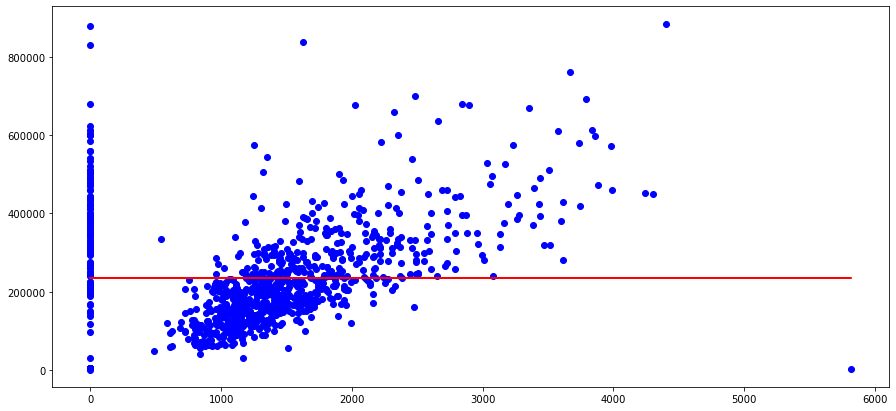

In [23]:
draw_plot(X, Y, yhat)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [25]:
# ANSWER
res = abs(house1['price'] - house1['y_hat']).mean()
res

103452.16956891476

In [ ]:
# shorter way to find the residuals
abs(house1.price - house1.y_hat).mean()

In [118]:
house1.price - house1.y_hat

0     -174922.263959
1     -165932.263959
2     -165264.263959
3     -164837.263959
4     -152244.263959
           ...      
980     -1719.263959
981      -144.263959
982       855.736041
983      1156.736041
984      1593.736041
Length: 985, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

In [119]:
house1.shape

(985, 5)

In [120]:
house1.head()

,beds,baths,sq__ft,price,y_hat
0,2,1,836,59222,234144.263959
1,3,1,1167,68212,234144.263959
2,2,1,796,68880,234144.263959
3,2,1,852,69307,234144.263959
4,2,1,797,81900,234144.263959


In [26]:
X = house1['sq__ft'].values.reshape(-1,1)
Y = house1['price'].values.reshape(-1,1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=10)

In [124]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # formula beta1, beta0

LinearRegression()

In [209]:
print(beta_0)

<function beta_0 at 0x00000248A58BC670>


In [46]:
print(regressor.coef_)

[[71.49906722]]


In [29]:
y_pred = regressor.predict(X_test) # y_hat = beta_0 + beat_1*X

NameError: name 'regressor' is not defined

In [126]:
y_pred

array([[234311.57581521],
       [241818.97787309],
       [133426.39197083],
       [185048.71850212],
       [185048.71850212],
       [303522.67288209],
       [206998.932138  ],
       [133426.39197083],
       [234955.06742017],
       [228377.15323613],
       [221298.74558156],
       [262124.71296296],
       [205711.94892807],
       [249755.37433427],
       [384817.11230878],
       [301163.2036639 ],
       [229449.6392444 ],
       [218295.78475842],
       [252901.33329185],
       [209072.40508731],
       [133426.39197083],
       [133426.39197083],
       [272063.08330624],
       [216365.30994353],
       [208571.91161679],
       [230665.1233871 ],
       [345063.63093566],
       [133426.39197083],
       [133426.39197083],
       [133426.39197083],
       [133426.39197083],
       [280285.47603629],
       [232238.1028659 ],
       [133426.39197083],
       [191340.63641729],
       [223658.21479975],
       [249540.87713261],
       [218009.78848954],
       [2338

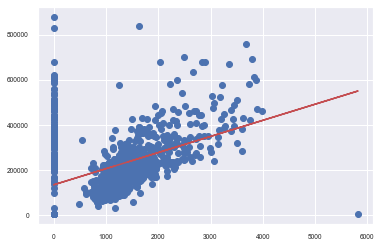

In [127]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [30]:
# ANSWER
X = house1['sq__ft']
Y = house1['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [31]:
# Beta1 = slope
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

beta_1 = calculate_beta_1(X, Y)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [32]:
# ANSWER Beta 0 = intercept
def calculate_beta_0(X, Y):
    
    x_bar = X.mean()
    y_bar = Y.mean()
    
    beta_0 = y_bar - calculate_beta_1(X, Y) * x_bar
    
    return beta_0

In [33]:
beta_0 = calculate_beta_0(X, Y)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [39]:
# ANSWER: yhat = predicted value
def calculate_yhat(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

In [40]:
yhat = calculate_yhat(X, beta_0, beta_1)
yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

In [41]:
# For house 500 sq__ft
new_house = 500

In [42]:
calculate_yhat(500, beta_0, beta_1)

190009.48125126315

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [43]:
# ANSWER
def calculate_residuals(y, yhat):
    res = y - yhat
    return res

In [44]:
res = calculate_residuals(y, yhat)
abs(res)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

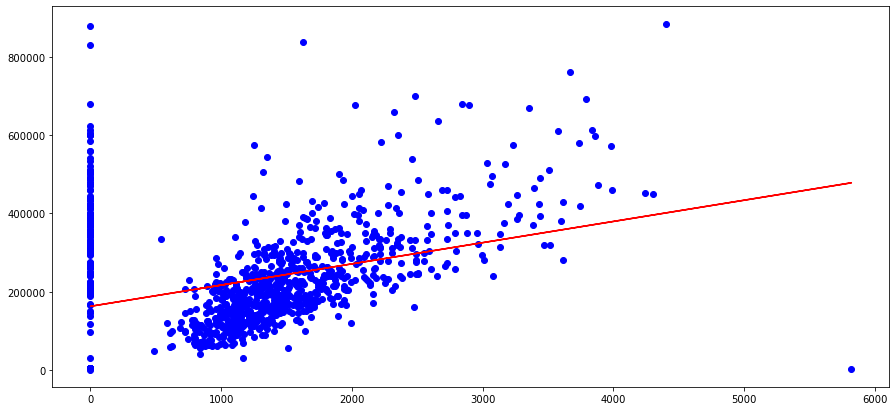

In [45]:
draw_plot(X,Y,yhat)

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [46]:
# ANSWER: the total sum of squares formula SStot
def calculate_total_sum_of_square(Y):
    ybar = np.mean(Y)
    SStot = np.square(Y - ybar)
    SStot = np.sum(SStot)
    return SStot

In [47]:
# the residual sum of squares formula
def calculate_residuals_sum_of_square(Y, yhat):
    SSres = np.square(Y - yhat)
    SSres = np.sum(SSres)
    return SSres

In [48]:
# formula R2
def calculate_r_square(Y,yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residuals_sum_of_square(Y, yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [49]:
calculate_r_square(Y, np.mean(Y))

0.0

In [50]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [ ]:
# ANSWER

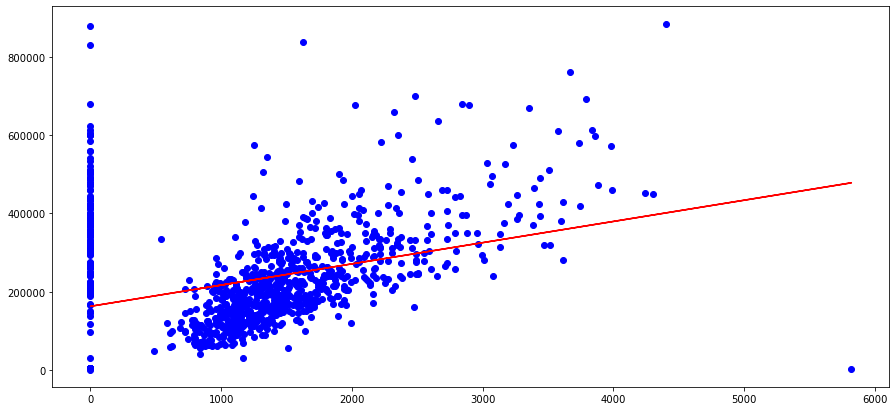

In [51]:
draw_plot(X, Y, yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [61]:
# ANSWER
X_pred = 1204
X_pred

1204

In [62]:
beta_0

162930.16140699777

In [63]:
beta_1

54.158639688530755

In [65]:
Ypred = beta_1 * X_pred + beta_0
Ypred

228137.1635919888

In [66]:
# 3 bedrooms, 2 baths, 1201 sq__ft

yhat = beta_0 + beta_1 * 3 + beta_1 * 2 * 1204



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



